### AI Assignments No. 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from scipy import io
from load_hoda import load_hoda

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 1) SVC Classifier</b><br>
Train a LinearSVC on the Hoda dataset and print the accuracy on the test set.
Does your model learn?
Now divide the dataset by 255 and train again.
Do you observe any difference in the model's learning? Why is that?
Plot a few error samples. Can you analyze the reasons for the errors?
</div>

In [3]:
X_train, y_train, X_test, y_test = load_hoda(size = 5)

In [4]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(1000, 25) (200, 25) (1000,) (200,)


In [5]:
X_train[0]

array([153, 229,   0,   0, 255, 255,   0,  77, 255,   0,   0, 255, 255,
         0,   0,   0, 255,  77,   0,   0,   0, 255,   0,   0,   0],
      dtype=uint8)

In [6]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy without normalization: {accuracy:.2f}")

accuracy without normalization: 0.75


C:\Users\Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


It seems it can be trained

In [7]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [8]:
X_train[0]

array([0.6       , 0.89803922, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.30196078, 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.30196078, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ])

In [9]:
model = LinearSVC()
model.fit(X_train, y_train)

y_pred_normalized = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_normalized)
print(f"accuracy with normalization: {accuracy:.2f}")

accuracy with normalization: 0.91


we can observe that the accuracy increases

Showing some of the incorrect predictions

In [10]:
incorrect_indices = np.where(y_pred_normalized != y_test)[0]
incorrect_samples = X_test[incorrect_indices]
incorrect_labels = y_test[incorrect_indices]
predicted_labels = y_pred_normalized[incorrect_indices]

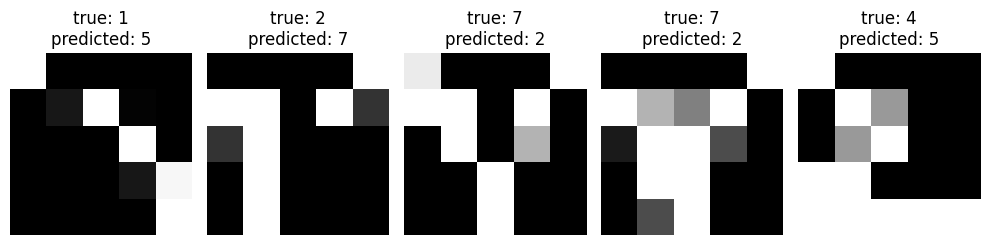

In [11]:
import matplotlib.pyplot as plt

num_samples_to_show = 5

plt.figure(figsize=(10, 5))
for i in range(num_samples_to_show):
    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(incorrect_samples[i].reshape(5, 5), cmap='gray') 
    plt.title(f"true: {incorrect_labels[i]}\npredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()

Possible Reasons for Errors

Inappropriate Image Size: The image size might not be suitable, and a larger size might be needed.   
Data Variability: Some digits in the dataset might be written similarly or contain noise, confusing the model.  
Insufficient Data: If there are too few training samples for certain digits, the model cannot learn their patterns well.  
Model Complexity: If the model is too simple, it might not be able to recognize more complex patterns.  
Inadequate Normalization: If normalization is not done correctly or if the data has different scales, the model might have lower accuracy.  

___

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 2) Using Linear Models for Handwritten Digit Recognition</b><br>
Assuming the images in the Hoda dataset are 5x5, classify them using a linear Logistic Regression model. Then, apply regularization using the L1 and L2 penalties, which we learned about in the Lasso and Ridge sections (for more information, see: regression-learn.org/stable/modules/linear_model.html). Does using this method improve the situation in this dataset? Why do you think that? Please explain in a document or at the end of your notebook file.
</div>

In [12]:
X_train, y_train, X_test, y_test = load_hoda(size = 14)

X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"acc without regularization: {accuracy:.2f}")

acc without regularization: 0.95


In [14]:
C=[0.001,0.01,0.1,1,10,100,1000, 10000]
    
for c in C:
    model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=c)
    model_l1.fit(X_train, y_train)

    y_pred_l1 = model_l1.predict(X_test)

    accuracy_l1 = accuracy_score(y_test, y_pred_l1)
    print(f"acc with L1 regularization: {accuracy_l1:.2f}")

acc with L1 regularization: 0.07
acc with L1 regularization: 0.31
acc with L1 regularization: 0.92
acc with L1 regularization: 0.95
acc with L1 regularization: 0.94
acc with L1 regularization: 0.95
acc with L1 regularization: 0.95
acc with L1 regularization: 0.94


In [15]:
C=[0.001,0.01,0.1,1,10,100,1000, 10000]
    
for c in C:
    model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, C=c)
    model_l2.fit(X_train, y_train)

    y_pred_l2 = model_l2.predict(X_test)

    accuracy_l2 = accuracy_score(y_test, y_pred_l2)
    print(f"acc with L2 regularization: {accuracy_l2:.2f}")

acc with L2 regularization: 0.79
acc with L2 regularization: 0.91
acc with L2 regularization: 0.94
acc with L2 regularization: 0.95
acc with L2 regularization: 0.95
acc with L2 regularization: 0.94
acc with L2 regularization: 0.94
acc with L2 regularization: 0.94


Does using regularization methods improve the situation?

    L1 Regularization: This method, due to its ability to eliminate non-useful features, may increase accuracy. If some features have little impact on predictions, this method can set them to zero, resulting in a simpler and more interpretable model.
    L2 Regularization: This method helps distribute weights and prevents any feature from having too much influence. If the data contains noise or correlated features, it can help improve the model's performance.

In general, using L1 and L2 regularization methods usually helps reduce overfitting and improves the overall performance of the model.

___

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 3) House Price Regression</b><br>
Please load the house price dataset using the following command and set aside a portion for testing. Then, train a linear regression model on it: (Note: The specific command for loading the dataset is not provided in the query, so you would need to specify that based on your dataset and environment.)
</div>

In [16]:
file_url = "https://raw.githubusercontent.com/emanhamed/Houses-dataset/master/Houses%20Dataset/HousesInfo.txt"
columns = ["bedroom", "bathroom", "area", "zipcodes", "price"]

In [17]:
df = pd.read_csv(file_url, sep=" ", names= columns)
df

,bedroom,bathroom,area,zipcodes,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


let's look at correlation between each feature and the price

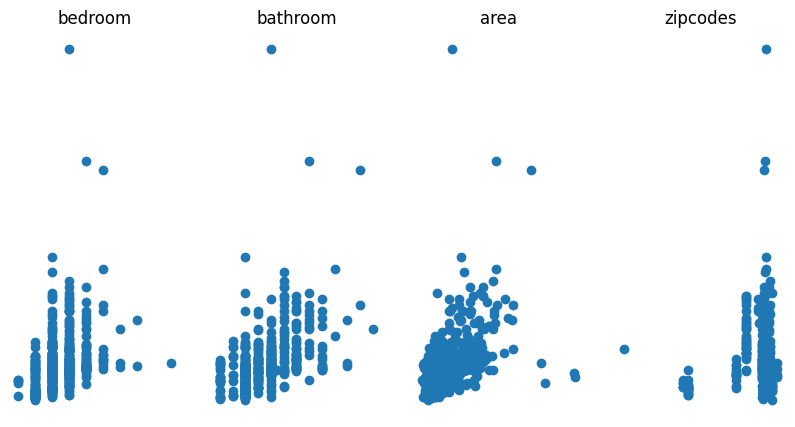

In [18]:
plt.figure(figsize=(10, 5))
for i,c in enumerate(columns[0:4]):
    plt.subplot(1, len(columns)-1 , i + 1)
    plt.scatter(df[c], df["price"]) 
    plt.title(columns[i])
    plt.axis('off')

# plt.tight_layout()

In [19]:
X = df[["bedroom", "bathroom", "area", "zipcodes"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
print(y[2], y_pred[2])

889000 197814.98505109083


In [22]:
print(y[100], y_pred[100])

549000 560138.1940983618


In [23]:
print(y[50], y_pred[50])

214900 641618.6033418542


Too much difference !!!

In [24]:
model.score(X_test, y_test)

0.34711494557300926

not good

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

MSE: 90399212212.85
r2 score: 0.35


very bad

### Solving the problem

Zip code number does not mean anythin in amount

In [26]:
file_url = "https://raw.githubusercontent.com/emanhamed/Houses-dataset/master/Houses%20Dataset/HousesInfo.txt"
columns = ["bedroom", "bathroom", "area", "zipcodes", "price"]
df = pd.read_csv(file_url, sep=" ", names= columns)

Removing Zip Codes with Low Frequency:

In [27]:
zip_counts = df.zipcodes.value_counts()
zip_counts

92276    100
93510     60
93446     54
92880     49
94501     41
91901     32
92677     26
94531     22
96019     12
85255     12
92021     11
85266     11
93111     11
81524     11
95220     10
92802      9
85262      9
62234      7
62214      4
98021      4
85377      3
91752      3
60002      3
81418      2
62025      2
92253      2
60016      2
92692      2
90265      1
62034      1
62088      1
91915      1
94565      1
95008      1
90803      1
90038      1
93314      1
93720      1
93924      1
92040      1
90211      1
94568      1
92543      1
62249      1
85331      1
93105      1
60046      1
36372      1
81521      1
Name: zipcodes, dtype: int64

In [28]:
zip_counts.values

array([100,  60,  54,  49,  41,  32,  26,  22,  12,  12,  11,  11,  11,
        11,  10,   9,   9,   7,   4,   4,   3,   3,   3,   2,   2,   2,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int64)

In [29]:
zip_counts.index

Int64Index([92276, 93510, 93446, 92880, 94501, 91901, 92677, 94531, 96019,
            85255, 92021, 85266, 93111, 81524, 95220, 92802, 85262, 62234,
            62214, 98021, 85377, 91752, 60002, 81418, 62025, 92253, 60016,
            92692, 90265, 62034, 62088, 91915, 94565, 95008, 90803, 90038,
            93314, 93720, 93924, 92040, 90211, 94568, 92543, 62249, 85331,
            93105, 60046, 36372, 81521],
           dtype='int64')

In [30]:
good_zipcodes = zip_counts.index[zip_counts.values>=25]
good_zipcodes

Int64Index([92276, 93510, 93446, 92880, 94501, 91901, 92677], dtype='int64')

In [31]:
idx = np.isin(df.zipcodes.values, good_zipcodes)

In [32]:
df = df[idx]
df

,bedroom,bathroom,area,zipcodes,price
30,5,3.0,2520,93446,789000
32,3,2.0,1802,93446,365000
39,3,3.0,2146,93446,455000
80,4,2.5,2464,91901,599000
81,2,2.0,1845,91901,529800
...,...,...,...,...,...
499,4,4.0,3000,93446,1495000
500,3,2.0,2330,93446,599900
501,3,2.5,1339,93446,344900
502,3,2.0,1472,93446,309995


In [33]:
len(df)

362

In [34]:
df.index = np.arange(0,362)
df

,bedroom,bathroom,area,zipcodes,price
0,5,3.0,2520,93446,789000
1,3,2.0,1802,93446,365000
2,3,3.0,2146,93446,455000
3,4,2.5,2464,91901,599000
4,2,2.0,1845,91901,529800
...,...,...,...,...,...
357,4,4.0,3000,93446,1495000
358,3,2.0,2330,93446,599900
359,3,2.5,1339,93446,344900
360,3,2.0,1472,93446,309995


making zipcodes one hot

In [35]:
df = pd.get_dummies(df, columns=['zipcodes'])
df

,bedroom,bathroom,area,price,zipcodes_91901,zipcodes_92276,zipcodes_92677,zipcodes_92880,zipcodes_93446,zipcodes_93510,zipcodes_94501
0,5,3.0,2520,789000,0,0,0,0,1,0,0
1,3,2.0,1802,365000,0,0,0,0,1,0,0
2,3,3.0,2146,455000,0,0,0,0,1,0,0
3,4,2.5,2464,599000,1,0,0,0,0,0,0
4,2,2.0,1845,529800,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
357,4,4.0,3000,1495000,0,0,0,0,1,0,0
358,3,2.0,2330,599900,0,0,0,0,1,0,0
359,3,2.5,1339,344900,0,0,0,0,1,0,0
360,3,2.0,1472,309995,0,0,0,0,1,0,0


normalizing other fields

In [36]:
max_price = max(df.price)
df.price = df.price/max_price

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = ["bedroom", "bathroom", "area"]
df[["bedroom", "bathroom", "area"]]= pd.DataFrame(scaler.fit_transform(df[numeric_columns]))
df

,bedroom,bathroom,area,price,zipcodes_91901,zipcodes_92276,zipcodes_92677,zipcodes_92880,zipcodes_93446,zipcodes_93510,zipcodes_94501
0,0.444444,0.333333,0.288776,0.134688,0,0,0,0,1,0,0
1,0.222222,0.166667,0.174790,0.062308,0,0,0,0,1,0,0
2,0.222222,0.333333,0.229401,0.077672,0,0,0,0,1,0,0
3,0.333333,0.250000,0.279886,0.102253,1,0,0,0,0,0,0
4,0.111111,0.166667,0.181616,0.090440,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
357,0.333333,0.500000,0.364979,0.255207,0,0,0,0,1,0,0
358,0.222222,0.166667,0.258612,0.102407,0,0,0,0,1,0,0
359,0.222222,0.250000,0.101286,0.058877,0,0,0,0,1,0,0
360,0.222222,0.166667,0.122400,0.052918,0,0,0,0,1,0,0


Regression task

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('price', axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

MSE: 0.00
r2 score: 0.79


In [39]:
for i in range(0,56,5):
    print('true: ',y[i]*max_price, 'predicted: ', y_pred[i]*max_price)

true:  789000.0 predicted:  328940.4296875
true:  397500.0 predicted:  617835.9375
true:  824999.9999999999 predicted:  60067.3828125
true:  979000.0 predicted:  125855.46875
true:  469999.99999999994 predicted:  1330063.4765625
true:  245900.0 predicted:  183062.5
true:  875000.0 predicted:  314638.671875
true:  949000.0 predicted:  554908.203125
true:  1349000.0 predicted:  128715.8203125
true:  1200000.0 predicted:  443354.4921875
true:  389900.0 predicted:  -85810.546875
true:  1045000.0 predicted:  489120.1171875


___

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 4) Regression of Vehicle Fuel Consumption</b><br>
Load the fuel consumption dataset. Then, split the data into training and testing sets with an 80:20 ratio and train a regression model to estimate MPG (which represents vehicle fuel consumption). The origin feature represents the country of manufacture and is coded as follows:
{1: 'USA', 2: 'Europe', 3: 'Japan'}

✓ Dataset path:
http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
</div>

In [40]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]

raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace='true')
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [41]:
raw_dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [42]:
raw_dataset[raw_dataset.isnull().any(axis=1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [43]:
raw_dataset.dropna(inplace=True)

In [44]:
len(raw_dataset)

392

In [45]:
raw_dataset.index = np.arange(0,392)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = ["Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year"]
raw_dataset.iloc[:,1:7]= pd.DataFrame(scaler.fit_transform(raw_dataset[numeric_columns]))
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,1
1,15.0,1.0,0.728682,0.646739,0.589736,0.208333,0.0,1
2,18.0,1.0,0.645995,0.565217,0.516870,0.178571,0.0,1
3,16.0,1.0,0.609819,0.565217,0.516019,0.238095,0.0,1
4,17.0,1.0,0.604651,0.510870,0.520556,0.148810,0.0,1
...,...,...,...,...,...,...,...,...
387,27.0,0.2,0.186047,0.217391,0.333711,0.452381,1.0,1
388,44.0,0.2,0.074935,0.032609,0.146583,0.988095,1.0,2
389,32.0,0.2,0.173127,0.206522,0.193365,0.214286,1.0,1
390,28.0,0.2,0.134367,0.179348,0.286929,0.630952,1.0,1


In [47]:
raw_dataset = pd.get_dummies(raw_dataset, columns=['Origin'])
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,1,0,0
1,15.0,1.0,0.728682,0.646739,0.589736,0.208333,0.0,1,0,0
2,18.0,1.0,0.645995,0.565217,0.516870,0.178571,0.0,1,0,0
3,16.0,1.0,0.609819,0.565217,0.516019,0.238095,0.0,1,0,0
4,17.0,1.0,0.604651,0.510870,0.520556,0.148810,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,0.2,0.186047,0.217391,0.333711,0.452381,1.0,1,0,0
388,44.0,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0,1,0
389,32.0,0.2,0.173127,0.206522,0.193365,0.214286,1.0,1,0,0
390,28.0,0.2,0.134367,0.179348,0.286929,0.630952,1.0,1,0,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = raw_dataset.iloc[:,1:]
y = raw_dataset["MPG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"r2 score: {r2}")

MSE: 10.602279011688358
r2 score: 0.7922774714022582
